In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()

In [67]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [68]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


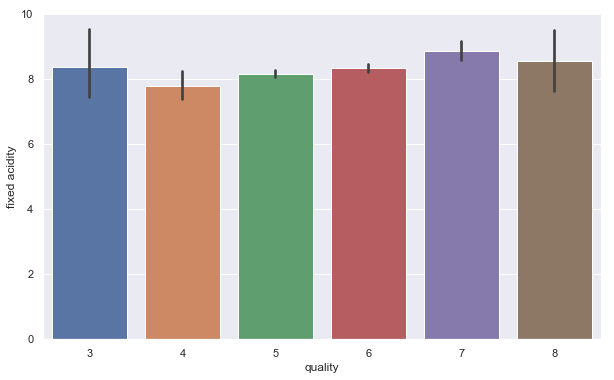

In [69]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality',y='fixed acidity',data=wine)
plt.show()

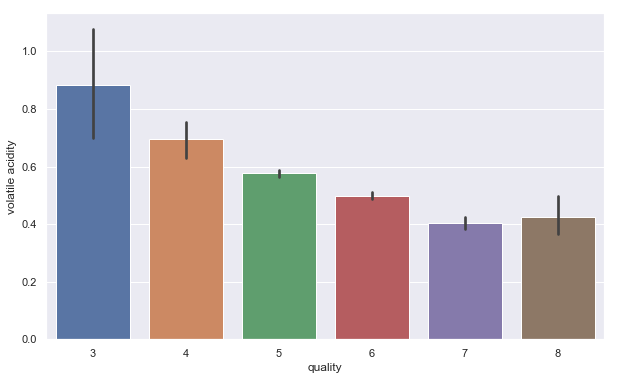

In [70]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='volatile acidity',data= wine)
plt.show()

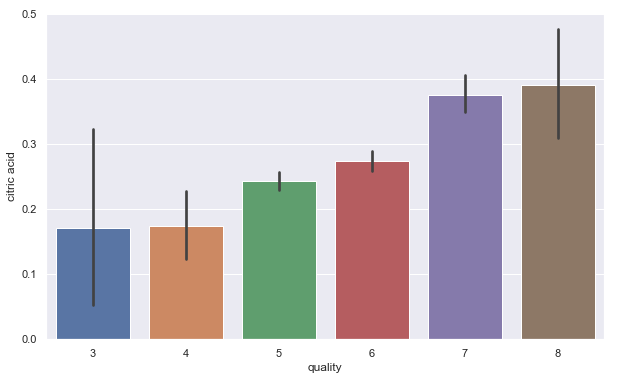

In [71]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='citric acid',data= wine)
plt.show()

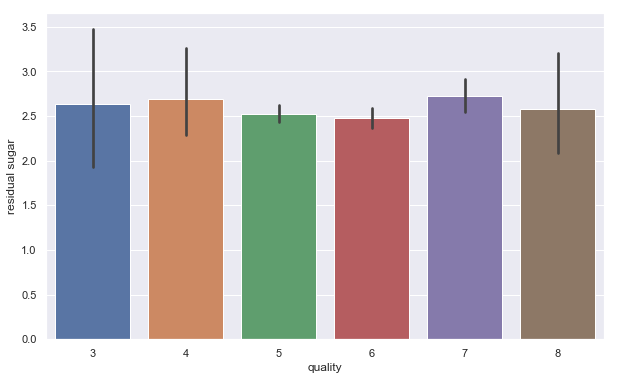

In [72]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='residual sugar',data= wine)
plt.show()

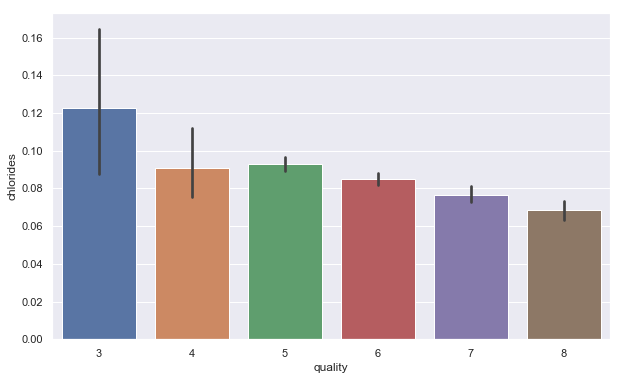

In [73]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='chlorides',data= wine)
plt.show()

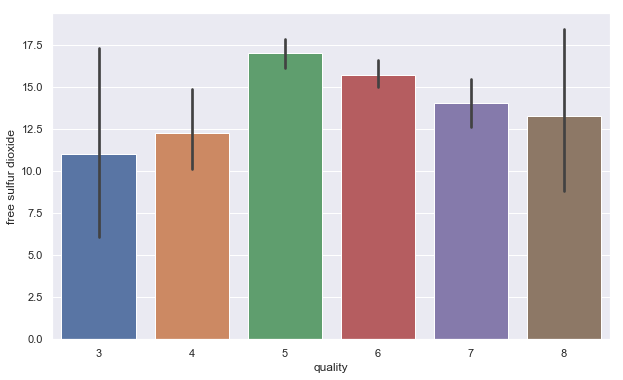

In [74]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='free sulfur dioxide',data= wine)
plt.show()

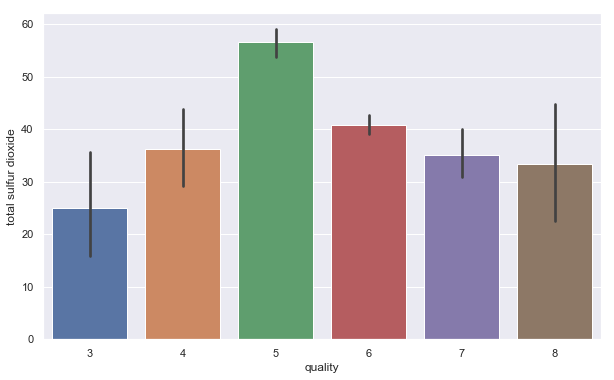

In [75]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='total sulfur dioxide',data= wine)
plt.show()

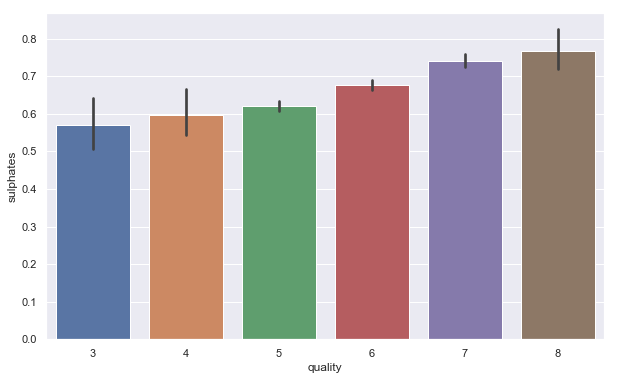

In [76]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='sulphates',data= wine)
plt.show()

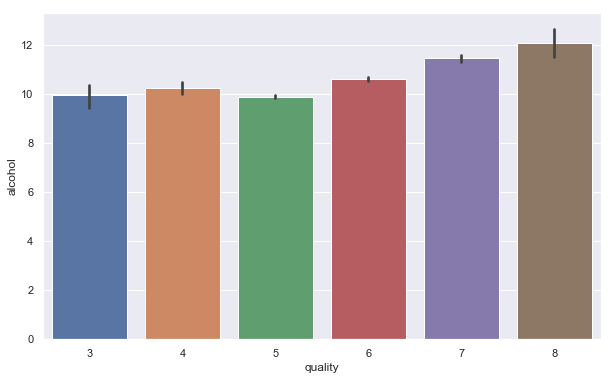

In [77]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='alcohol',data= wine)
plt.show()

In [78]:
bins=(2,6.5,8)
group_names=['bad','good']
wine['quality']=pd.cut(wine['quality'],bins=bins,labels=group_names)

In [79]:
from sklearn.preprocessing import LabelEncoder
label_quality=LabelEncoder()

In [80]:
wine['quality']=label_quality.fit_transform(wine['quality'])

In [81]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

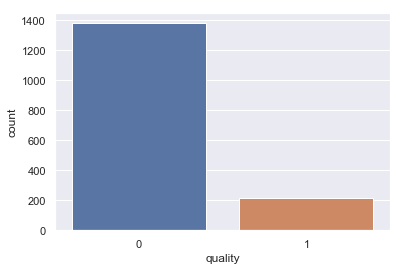

In [89]:
sns.countplot(wine['quality'])
plt.show()

In [92]:
X=wine.drop('quality',axis=1)
y=wine['quality']

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [94]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [95]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()

In [96]:
tree.fit(X_train,y_train)
y_pred =tree.predict(X_test)

In [97]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.93      0.92       273\n           1       0.50      0.43      0.46        47\n\n   micro avg       0.85      0.85      0.85       320\n   macro avg       0.70      0.68      0.69       320\nweighted avg       0.84      0.85      0.85       320\n'

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [99]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    #plot no skill
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positve Rate')
    plt.title('Reciever Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    


In [98]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_pred)
print('AUC: {:.2f}'.format(auc))

AUC: 0.68


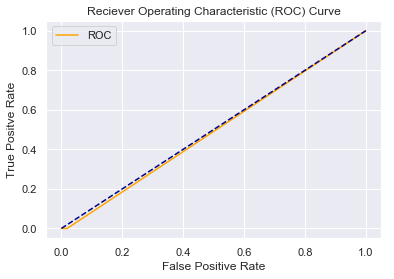

In [100]:
plot_roc_curve(fpr,tpr)

In [101]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [102]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

C:\Users\USER\Anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [103]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.98      0.93       273\n           1       0.71      0.26      0.37        47\n\n   micro avg       0.88      0.88      0.88       320\n   macro avg       0.80      0.62      0.65       320\nweighted avg       0.86      0.88      0.85       320\n'

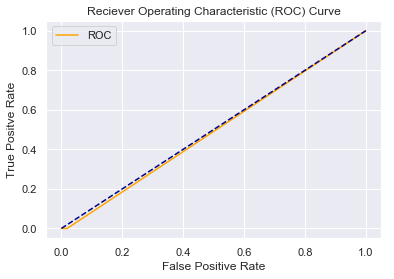

In [104]:
plot_roc_curve(fpr,tpr)

In [106]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)

In [107]:
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [108]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.97      0.93       273\n           1       0.67      0.34      0.45        47\n\n   micro avg       0.88      0.88      0.88       320\n   macro avg       0.78      0.66      0.69       320\nweighted avg       0.86      0.88      0.86       320\n'

In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[265,   8],
       [ 31,  16]], dtype=int64)